In [108]:
import pandas as pd
import numpy as np
from googletrans import Translator
import seaborn as sns

In [9]:
def read_file(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        data = file.readlines()
    return data

def write_batch(file_path, line):
    with open(file_path, 'a', encoding="utf-8") as f:
        f.write(line.text + '\n')

def translate_file(src_path, dest_path, batch_size):
    text_file = read_file(src_path)
    batch_index = 0
    iteration = int(len(text_file) / batch_size)
    left_samples = (len(text_file) - (iteration * batch_size))

    translator = Translator()

    for iter_ in range(0, iteration):
        batch = text_file[batch_index:(batch_index+batch_size)]
        for line in batch:
            result = translator.translate(line, src='bn')
            write_batch(dest_path, result)
        batch_index += batch_size
        print('iter: {}....completed'.format(iter_))
    
    
    batch = text_file[batch_index: (batch_index+left_samples)]
    for line in batch:
        result = translator.translate(line, src='bn')
        write_batch(dest_path, result)
    print('left over document completed!')

In [107]:
# translate_file(src_path = r'D:\codes\begali_sentiment\all_negative_3307.txt',
#                 dest_path= r'D:\codes\begali_sentiment\test_negative_en.txt',
#                 batch_size=32              
# )

In [3]:
with open(r'D:\codes\begali_sentiment\all_positive_8500.txt', 'r', encoding='utf-8') as file:
    data = file.readlines()

In [12]:
df = pd.read_csv(r'D:\codes\begali_sentiment\quora_questio_data_valid.csv')

In [13]:
df.head()

,question_text,target
0,Should go for CCIE (security) as a fresher?,0
1,What has inspired K'naan to write his poems?,0
2,Why does my boyfriend not enjoy pleasing me se...,0
3,What does being a coward mean to you?,0
4,Has anyone on Quora encountered a deceased dog...,0


In [14]:
translation = Translator()

In [44]:
texts = df.question_text.values.tolist()
quora_translated = []
for text in texts:
    result = translation.translate(text, src='en', dest='bn').text
    quora_translated.append(result)

print(len(quora_translated))

1293


In [105]:
french_movie_review = pd.read_csv(r'D:\codes\begali_sentiment\french_movie_review_1200.csv')
french_movie_review.shape

(1200, 2)

In [106]:
french_movie_review.head()

,review,polarity
0,"Ce n'est pas un film policier - ""intrigue"" à l...",1
1,Mouais... C'est quand même un peu gros et arra...,1
2,Aaron et son frère Caleb vivent dans une ferme...,0
3,Malick sait parfaitement filmé des lieux magni...,1
4,Dans un huis-clos qui rappelle énormément l'un...,0


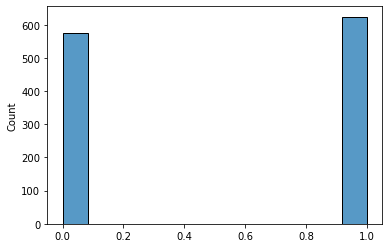

In [109]:
sns.histplot(data=french_movie_review, x=french_movie_review.polarity.values)

In [111]:
texts = french_movie_review.review.values.tolist()
french_translated = []
for text in texts:
    result = translation.translate(text, src='fr', dest='bn').text
    french_translated.append(result)

print(len(french_translated))

1200


In [112]:
french_movie_review['translated'] = french_translated

In [113]:
french_movie_review.head()

,review,polarity,translated
0,"Ce n'est pas un film policier - ""intrigue"" à l...",1,"এটি একটি পুলিশি সিনেমা নয় - ""ষড়যন্ত্র"" উভয় ..."
1,Mouais... C'est quand même un peu gros et arra...,1,হ্যাঁ ... এটি এখনও একটু বড় এবং কখনও কখনও ব্যব...
2,Aaron et son frère Caleb vivent dans une ferme...,0,হারুন ও তার ভাই কালেব ক্যালিফোর্নিয়ার সালিনাস...
3,Malick sait parfaitement filmé des lieux magni...,1,মালিক পুরোপুরি চিত্রিত সুন্দর জায়গাগুলি জানেন...
4,Dans un huis-clos qui rappelle énormément l'un...,0,একটি বন্ধ অধিবেশনে যা এই প্রথম ফিচারের চলচ্চিত...


In [114]:
french_movie_review.to_csv(r'D:\codes\begali_sentiment\french_movie_review_1200.csv', index=False)

In [115]:
x = ['মেয়ে পদা করে চললে এই রকম ধষন হবে না', 
    'নারীর অধিকার নিয়ে যারা লাফালাফি করে তারা আজ কোথায়?',
    'আপনারা উন্নয়ন করেছেন তাই জন্য ধন্যবাদ।',
    'সারা দেশে উন্নত যোগাযোগ বাবস্থা চাই',
    'আমরা একাত্তর টিভি বয়কট করেছি',
    'সব চুরদের বড় চুর ৭১টিভি',
    'সব শালা চোর।',
    'হলুদ সাংবাদিকতা বন্ধ করুন।',
    '৭১ টিভিরে জুরে একটা লাথি মারি',
    'রাষ্ট্র ও রাষ্ট্রধর্ম রাষ্ট্রের মৌলিক উপাদান ৪টি।',
    'বাংলাদেশ ক্রিকেট জগৎ, বাংলাদেশের ক্রিকেটের লাইভ ভিডিও সহকারে আপডেট পেতে লাইক দিন পেজে।',
    'কি পেয়েছি আমরা শাদিন দেশে চুর বাটপার',
    'সোয়াবের কাজ বিনা হিসাবে জাহান্নাম।',
    'কয় স্টিক মারছেন?',
    'ইভটিজিং কারীদের ক্রস ফায়ারের আওতায় আনা উচিত বলে আমি মনে করি।তাহলে অপরাধ কমবে।',
    'রাষ্ট্রধর্ম ইসলাম বাতিল দাবির পৃষ্ঠপোষক ৭১ টিভির লাইসেন্স বাতিল করা হোক।',
    'উনাঅনের জোয়ার বইছে',
    'এক কথায় অসাধারণ যুক্তি।',
    'একটি fresher হিসাবে CCIE (নিরাপত্তা) জন্য যেতে হবে?',
    'আমি যদি তাদের সাথে যেতে পারি তবে আমি কিভাবে আমার বন্ধুদের জিজ্ঞাসা করতে পারি?',
    'ছেলেরা কেন বুঝতে পারছেন না আমরা কতটা ভালোবাসি?',
    'উত্তর ভারত অর্থনৈতিক উন্নয়নের জন্য দক্ষিণ ভারতে কতদিন নির্ভর করবে?',
    'কেন থানস সঙ্গে ডাক্তার অদ্ভুত চুক্তি না?',
    'দেশপ্রেমিক ভারতীয়রা কেন তাদের দেশে মানবাধিকারের অপব্যবহারের জন্য অন্ধ চোখ ঘুরিয়ে দেয়?',
    'এক্রাইলিক শাটার বনাম polyether?রান্নাঘর ক্যাবিনেটের জন্য',
    'মঙ্গল সোভা যাত্রা ইসলাম বিরোধী কাজ',
    'মামা খুশ হে না',
    'ভাই তুই একটা মাদারচোদ।',
    'আপনি আমার বাল। ',
    'আপনি অনেক বড় একটা খানকির পোলা',
    'আপনার থেকে বড় মাদারচোদ আমি আর দেখি নাই।',
    'এই মাগীর ছেলে।',
    'কবে যানি ভূকম্পনে এ রমনা বটমূল মাটির সাথে মিশে যায়।',
    'কালো টাকা দিয়া সবকিছু কড়া জায়া',
    'ভন্ডামী শালীরা। অমুসলিম।',
    'অমঙ্গল শোভাযাত্রা বাপ দাদার নাম নাই গোদের উপর ট্যাম হিন্দুদের হিন্দি কালচার পালন করে আবার বলে বাঙালি ছি?',
    'বসে বসে মুড়ি খাও',
    'হিজ্রা কোথাকার',
    'উনি আমার প্রিয় রাজনৈতিক ব্যত্তিত্ব',
    'পহেলা বৈশাখে শাক সবজি কাওয়া ভাল। অনেক রোখ থেকে মুক্তি পাওয়া যায়।',
    'চলুন আমরা সবাই পান্তা ইলিশ বর্জন করি',
    'গনতন্ত্র হাসিনার দখলে।',
    'বর্তমান রাজনীতি, পকেট ভরার রাজনীতি।',
    'প্রাণ প্রিয় মুসলমান ভাই বোনেরা কোথায়?? ইসলামিক পেজে লাইক দরকার।',
    'তারা মন্ত্রি-নেতা নামে পশু কুকুর সয়তান।',
    'Mh Sojib ভাই এইটা লাস্ট পর্যন্ত দেখ ?',
    'ADD দিলে ৫ Second এর মধ্যেই Accept করেবো। ১৮ "ঘন্টা "এক্টিব "থাকি "আর "সবসময় "লাইক "কমেন্ট "করার "চেষ্টা "করি। "চাইলে "এড "করতে " পারেন।',
    'আইন সবার জন্য সমান এটা সংবিধান স্বীকৃত',
    '♥ Good Morning ♥ ঘুম ঘুম রাত শেষে, সূর্য আবার উঠলো হেসে ফুটলো আবার ভোরের আলো,, দিনটা সবার কাটুক ভালো .. শুরু হল...',
    'ইন্টারেস্টিং......',
    'আপনার রিসেন্ট পোষ্টগুলোর ৮০% এ বদমাশ ফিতনাবাজদের দূর্গন্ধ পাওয়া যায়।',
    'সমকামিতাকে "তখন" কুরুচিপূর্ণ অশ্লীল মনে করা হতো, তো এখন কি মনে করা হয় এডমিন ব্রো? শ্লীল এবং রুচিসম্মত বিষয়?',
    'নরমালি বায়োপিক দেখিনা কারণ বোরিং লাগে। কিন্তু ইমিটেশন গেম দেখছিলাম, কাম্বারব্যাচের অভিনয় জাস্ট অসাধারণ ছিলো৷',
    'আমি শিওর না। তবে মুভিতে দেখিয়েছিল আপেলে বিষ মিশিয়ে আত্মহত্যা করা হয়।',
    'সেই সময় সেই দেশের সরকার ভালো পদক্ষেপ নিয়েছিল।',
    'এখন সমকামীদের পবিত্র মনে করা হয় বুঝি',
    'ইতিহাসে তোমার চুতিয়াপা সোনার অক্ষরে লেখা থাকবে।',
    'একটা মানুষকে তার সেক্সুয়াল অরিয়েন্টেশন নিয়ে কেন অসম্মান করা হবে বুঝে আসে না। সে তো কারো ক্ষতি করেনি।',
    'মৃত্যুদন্ডের শাস্তি দেয়া উচিত ছিল',
    'এই দেশেও একদিন সমকামীরা আর সব মানুষের মত সমান মর্যাদা নিয়ে বাঁচবে।',
    'হাগু করার ছিদ্রকে পূজো করা লোকের অভাব নেই এখানে',
    'তাহলে এই মহান ব্যাক্তিকে পায়ু সৈনিক বলা হয় না কেন?',
    'সেইসব পুরুষরাই নারীবাদীদের দালালি করে, যারা নিজেদের পুরুষত্ব নিয়ে সন্দিহান।',
    'যেহেতু দুজনের সম্মতি থাকলে সেক্স করা যায় সেহেতু পরক্রিয়াকে আপনারা সাপোর্ট করেন নাকি?',
    'নিজেকে আকর্ষনীয় করে লোকদের দেখানোর কারণ তো যেন লোকেরা আকর্ষীত হয়।এখন আকর্ষীত করে,বিচার চাইলে কি তাঁকে সমর্থন করা উচিত।',
    'ধর্ষন একটা জঘন্য অপরাধ এবং শাস্তি হওয়া দরকার।',
    'নারীবাদিতার দোহাই দিয়ে খানকিগিরি সাপোর্ট করলেন',
    'আল্লাহ কারো আমলনামার হিসাব নেয়ার দায়িত্ব আপনাদের দেয়নি।',
    'পরী মনি আপু পাশে আছি শিল্পী হিসাবে - জনি সিন্স'
]

y_true = [1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 
    1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1]


data = {
    'text': x,
    'label': y_true
}

my_data = pd.DataFrame(data=data)

In [116]:
my_data.head()

,text,label
0,মেয়ে পদা করে চললে এই রকম ধষন হবে না,1
1,নারীর অধিকার নিয়ে যারা লাফালাফি করে তারা আজ কো...,1
2,আপনারা উন্নয়ন করেছেন তাই জন্য ধন্যবাদ।,0
3,সারা দেশে উন্নত যোগাযোগ বাবস্থা চাই,0
4,আমরা একাত্তর টিভি বয়কট করেছি,1


In [117]:
my_data.to_csv(r'D:\codes\begali_sentiment\social_media_comments.csv', index=False)

In [118]:
my_data.to_excel(r'D:\codes\begali_sentiment\social_media_comments.xlsx')